In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.integrate
from astropy.table import Table, join
import healpy
from clmm import Cosmology
import pyccl as ccl
import clmm
import glob

In [2]:
import pickle,sys

def load(filename, **kwargs):
    """Loads GalaxyCluster object to filename using Pickle"""
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

In [3]:
sys.path.append('./../../')
import _redshift_richness_bins

In [4]:
data_stackOm = load('/pbs/throng/lsst/users/cpayerne/CLCosmo_Sim_database/data_vary_fuducial_cosmology/stacked_esd_profiles_redmapper_vary_Omega_m.pkl')
Om = data_stackOm['Omega_m_value']
datastackOm = data_stackOm['Om0_stacked_profile']
idxOm = np.argmin(np.abs(Om - 0.2648))
closest_valueOm = Om[idxOm]

In [5]:
data_stackw = load('/pbs/throng/lsst/users/cpayerne/CLCosmo_Sim_database/data_vary_fuducial_cosmology/stacked_esd_profiles_redmapper_vary_wDE.pkl')
w = data_stackw['wDE_value']
datastackw = data_stackw['w0_stacked_profile']
idxw = np.argmin(np.abs(w - (-1)))
closest_valuew = w[idxw]

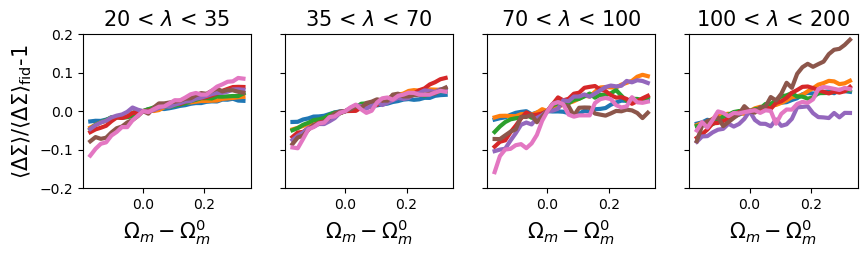

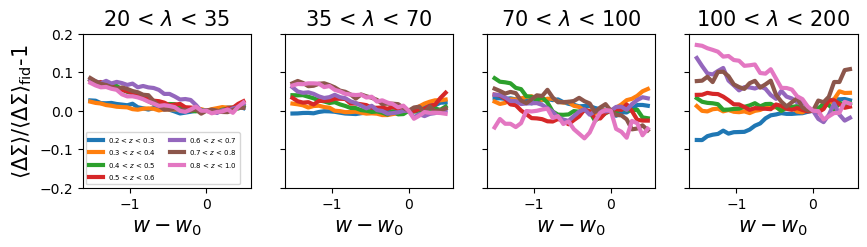

In [11]:
fig, ax = plt.subplots(1, len(_redshift_richness_bins.Obs_bin), sharey=True, sharex=True, figsize=(10,2))


for i, z_bin in enumerate(_redshift_richness_bins.Z_bin):
    for j, richness_bin in enumerate(_redshift_richness_bins.Obs_bin):
        ratio = []
        for k, Om_ in enumerate(Om):
            datastackOm = data_stackOm['Om'+str(k)+'_stacked_profile']
            maskz = (datastackOm['z_mean'] > z_bin[0])*(datastackOm['z_mean'] < z_bin[1])
            maskrichness = (datastackOm['obs_mean'] > richness_bin[0])*(datastackOm['obs_mean'] < richness_bin[1])
            maskbin = maskz * maskrichness

            datastackOmfid = data_stackOm['Om'+str(idxOm)+'_stacked_profile']
            datastackOmfid_bin = datastackOmfid[maskbin]
    
            x = np.array(datastackOmfid_bin['radius'][0])
            y = np.array(datastackOmfid_bin['DSt'][0])
    
            mask = (x > 1) & (x < 3.5)
    
            y_avg_trapzfid = np.trapz(y[mask], 2*np.pi*x[mask])
            y_avg_trapzfid *= 1/np.trapz(np.ones(np.sum(mask)), 2*np.pi*x[mask])
    
            datastackOm_bin = datastackOm[maskbin]
            x = np.array(datastackOm_bin['radius'][0])
            y = np.array(datastackOm_bin['DSt'][0])
            mask = (x > 1) & (x < 3.5)
            
            y_avg_trapz = np.trapz(y[mask], 2*np.pi*x[mask])
            y_avg_trapz *= 1/np.trapz(np.ones(np.sum(mask)), 2*np.pi*x[mask])
            ratio.append(y_avg_trapz/y_avg_trapzfid)

        ax[j].plot(Om-closest_valueOm, (np.array(ratio)-1), lw=3, label = f'{z_bin[0]} < $z$ < {z_bin[1]}')
        ax[j].set_ylim(-0.2, 0.2)
        ax[j].set_xlabel(r'$\Omega_m - \Omega_m^0$', fontsize=15)
        ax[j].set_title(f'{richness_bin[0]} < $\lambda$ < {richness_bin[1]}', fontsize=15)
        ax[0].set_ylabel(r'$\langle \Delta\Sigma\rangle/\langle \Delta\Sigma\rangle_{\rm fid}$-1', fontsize=15)

fig, ax = plt.subplots(1, len(_redshift_richness_bins.Obs_bin), sharey=True, sharex=True, figsize=(10,2))

for i, z_bin in enumerate(_redshift_richness_bins.Z_bin):
    for j, richness_bin in enumerate(_redshift_richness_bins.Obs_bin):
        ratio = []
        for k, w_ in enumerate(w):
            datastackw = data_stackw['w'+str(k)+'_stacked_profile']
            maskz = (datastackw['z_mean'] > z_bin[0])*(datastackw['z_mean'] < z_bin[1])
            maskrichness = (datastackw['obs_mean'] > richness_bin[0])*(datastackw['obs_mean'] < richness_bin[1])
            maskbin = maskz * maskrichness

            datastackwfid = data_stackw['w'+str(idxw)+'_stacked_profile']
            datastackwfid_bin = datastackwfid[maskbin]
    
            x = np.array(datastackwfid_bin['radius'][0])
            y = np.array(datastackwfid_bin['DSt'][0])
    
            mask = (x > 1) & (x < 3.5)
    
            y_avg_trapzfid = np.trapz(y[mask], 2*np.pi*x[mask])
            y_avg_trapzfid *= 1/np.trapz(np.ones(np.sum(mask)), 2*np.pi*x[mask])
    
            datastackw_bin = datastackw[maskbin]
            x = np.array(datastackw_bin['radius'][0])
            y = np.array(datastackw_bin['DSt'][0])
            mask = (x > 1) & (x < 3.5)
            
            y_avg_trapz = np.trapz(y[mask], 2*np.pi*x[mask])
            y_avg_trapz *= 1/np.trapz(np.ones(np.sum(mask)), 2*np.pi*x[mask])
            ratio.append(y_avg_trapz/y_avg_trapzfid)
        ax[j].plot(w - (closest_valuew), np.array(ratio)-1, lw=3, label = f'{z_bin[0]} < $z$ < {z_bin[1]}')
        ax[j].set_ylim(-0.2, 0.2)
        ax[j].set_xlabel(r'$w - w_0$', fontsize=15)
        ax[j].set_title(f'{richness_bin[0]} < $\lambda$ < {richness_bin[1]}', fontsize=15)
        ax[0].set_ylabel(r'$\langle \Delta\Sigma\rangle/\langle \Delta\Sigma\rangle_{\rm fid}$-1', fontsize=15)
ax[0].legend(fontsize=5, ncols=2)
        
#ax[0].legend(fontsize=7, ncols=2)

(1, 15)


[]

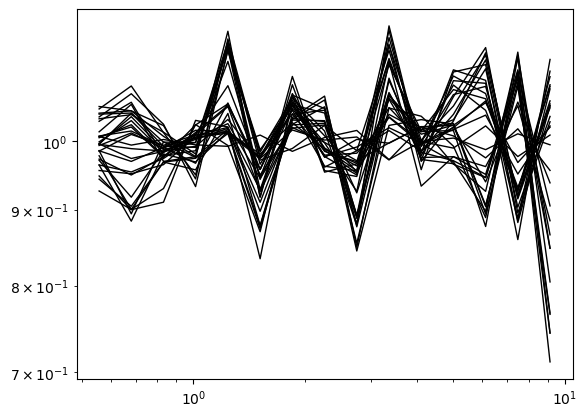

In [7]:
from scipy.interpolate import interp1d
for i, z_bin in enumerate(_redshift_richness_bins.Z_bin):
    for j, richness_bin in enumerate(_redshift_richness_bins.Obs_bin):
        data_interp_binOm = []
        for k, Om_ in enumerate(Om):
            datastackOm = data_stackOm['Om'+str(k)+'_stacked_profile']
            maskz = (datastackOm['z_mean'] > z_bin[0])*(datastackOm['z_mean'] < z_bin[1])
            maskrichness = (datastackOm['obs_mean'] > richness_bin[0])*(datastackOm['obs_mean'] < richness_bin[1])
            maskbin = maskz * maskrichness
            datastackOm_bin = datastackOm[maskbin]
            x = np.array(datastackOm_bin['radius'][0])
            y = np.array(datastackOm_bin['DSt'][0])
            data_interp_binOm.append(y)
        #plt.plot(x, y, 'k', lw=1)
            
        lin_interp = interp1d(Om, data_interp_binOm, axis=0, kind='linear',
        bounds_error=False, fill_value='extrapolate')
        Omegam_new = np.array([0.33])  # new omegam values
        profiles_new = lin_interp(Omegam_new) 
        print(profiles_new.shape)
        for y in data_interp_binOm:   
            plt.plot(x, y/profiles_new[0], 'k', lw=1)
        
        break
    break
plt.loglog()